# Прогноз необходимого числа набюдений эксперимента

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st

from numpy.random import binomial
from numpy.random import normal

***Определить необходимое число наблюдений в эксперименте для получения значимого результата:***
            
Текущий уровень конверсии: 1%
    
Минимальный уровень изменений: +0.1%
    
Уровень значимости: 95%
    
Требуемая мощность критерия: 90%
    
Проверить решение можно по ссылке: https://abtestguide.com/abtestsize/

In [3]:
# H0: конверсия не изменилась.
    
# Текущий уровень конверсии 0.01 - качество текущего алгоритма (А)
# 0.011 - качество нового алгоритма (B)
# Уровень значимости - вероятность попадания в довер.интервал (при условии, что H0 верна).
# Мощность критерия - вероятность не попасть в довер.интервал при условии, что гипотеза H0 не верна.

In [4]:
# Делаем серию экспериментов для А теста с P=0.01 и для B теста с P=0.011
# 0. Для каждой выборки из experiments = binomial(1, P, (M, N)) делаем:

# 1. Сгенерировать выборку из N элементов из бином.распределения с параметрами (1,0.011,N).
# 2. Считаем её среднее Xmean.
# 3. Используем z-тест:
#     diff = (XmeanB - XmeanA)       # разность средних значений двух экспериментов
#     z = diff / np.sqrt(0.01*(1-0.01)/N + 0.011*(1-0.011)/N)   # вычисляем z-статистику
#     z_quantile = st.norm.ppf(0.95)        # вычисляем квантиль z-статистики
    
# 4. P(z>z_quantile) >= 0.9
#    Считаем долю выборок таких, что z>z_quantile. Должно быть минимальное N такое, что >= 0.9. 

In [30]:
from tqdm import tqdm_notebook

z_quantile = st.norm.ppf(0.95)
num_exp = 1000 #500 - для большого шага

Res = []

#for N in tqdm_notebook(np.arange(100000,1000000,5000)): #ищем с большим шагом
for N in tqdm_notebook(np.arange(160000,180000,1000)): #ищем с маленьким шагом
    experimentsA = binomial(1, 0.01, (num_exp, N))
    experimentsB = binomial(1, 0.011, (num_exp, N))
    
    XmeanA = np.array([np.mean(exp) for exp in experimentsA])
    XmeanB = np.array([np.mean(exp) for exp in experimentsB])
    
    diff = XmeanB - XmeanA
    z = diff / np.sqrt(0.01 * (1 - 0.01) / N + 0.011 * (1 - 0.011) / N)
    res = sum([z>z_quantile][0]) / num_exp
    Res.append(res)
    print(N,res)
    if res >= 0.90:
        print(N)
        break

160000 0.865
161000 0.872
162000 0.873
163000 0.865
164000 0.875
165000 0.881
166000 0.874
167000 0.89
168000 0.884
169000 0.893
170000 0.892
171000 0.881
172000 0.895
173000 0.891
174000 0.896
175000 0.888
176000 0.911
176000


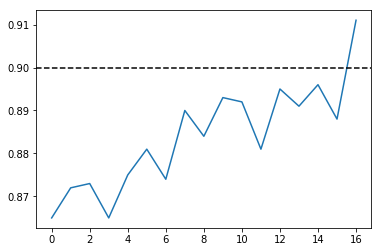

In [31]:
plt.plot(Res)
plt.axhline(0.9, color='k', linestyle='--')
plt.show()